In [12]:
import numpy as np
import time, os, sys

import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
import omero

%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 10)

from cellpose import utils
from cellpose import models



from omero_utils.widgets import OMEConnect

os.environ["MXNET_USE_FUSION"] = "0"


m = OMEConnect(host="139.124.86.50")

m

OMEConnect(children=(Text(value='', description='OME loggin'), Password(description='OME password'), Button(de…

In [13]:
ome_image = m.conn.getObject("Image", 18652)

In [15]:
ome_pixels = ome_image.getPixels()

TypeError: getPixels() missing 1 required positional argument: 'index'

In [ ]:
imgs = [ome_image.getPi]

In [6]:

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)

  0%|          | 0/3 [00:00<?, ?it/s]

>>>> using GPU
processing 3 image(s)


  0%|          | 0/3 [00:00<?, ?it/s]

estimated cell diameters for all images


100%|██████████| 3/3 [00:10<00:00,  3.55s/it]


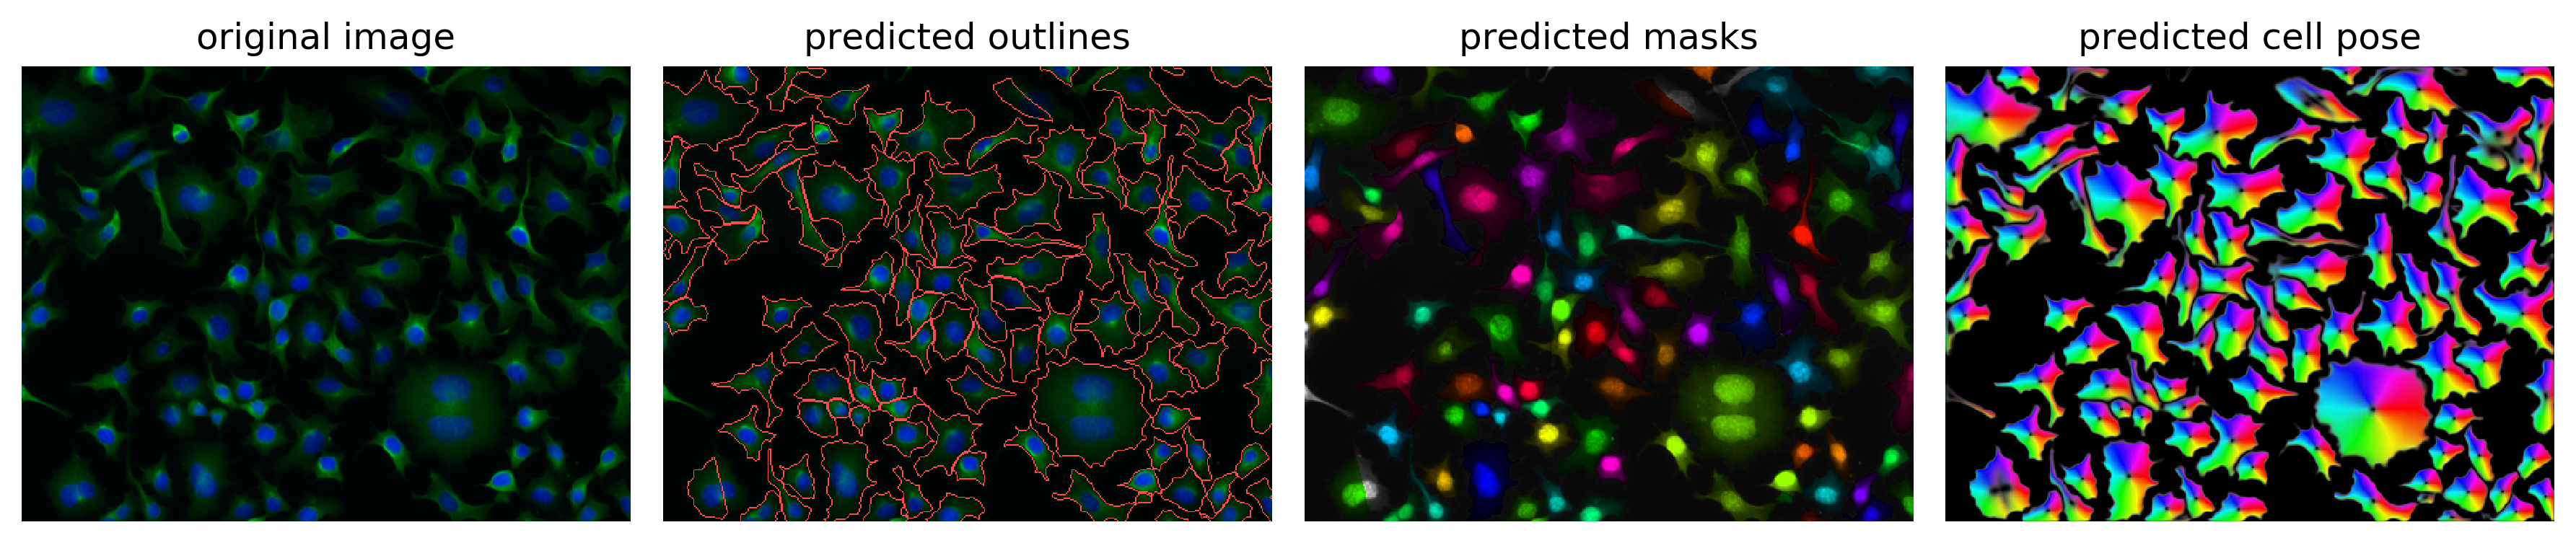

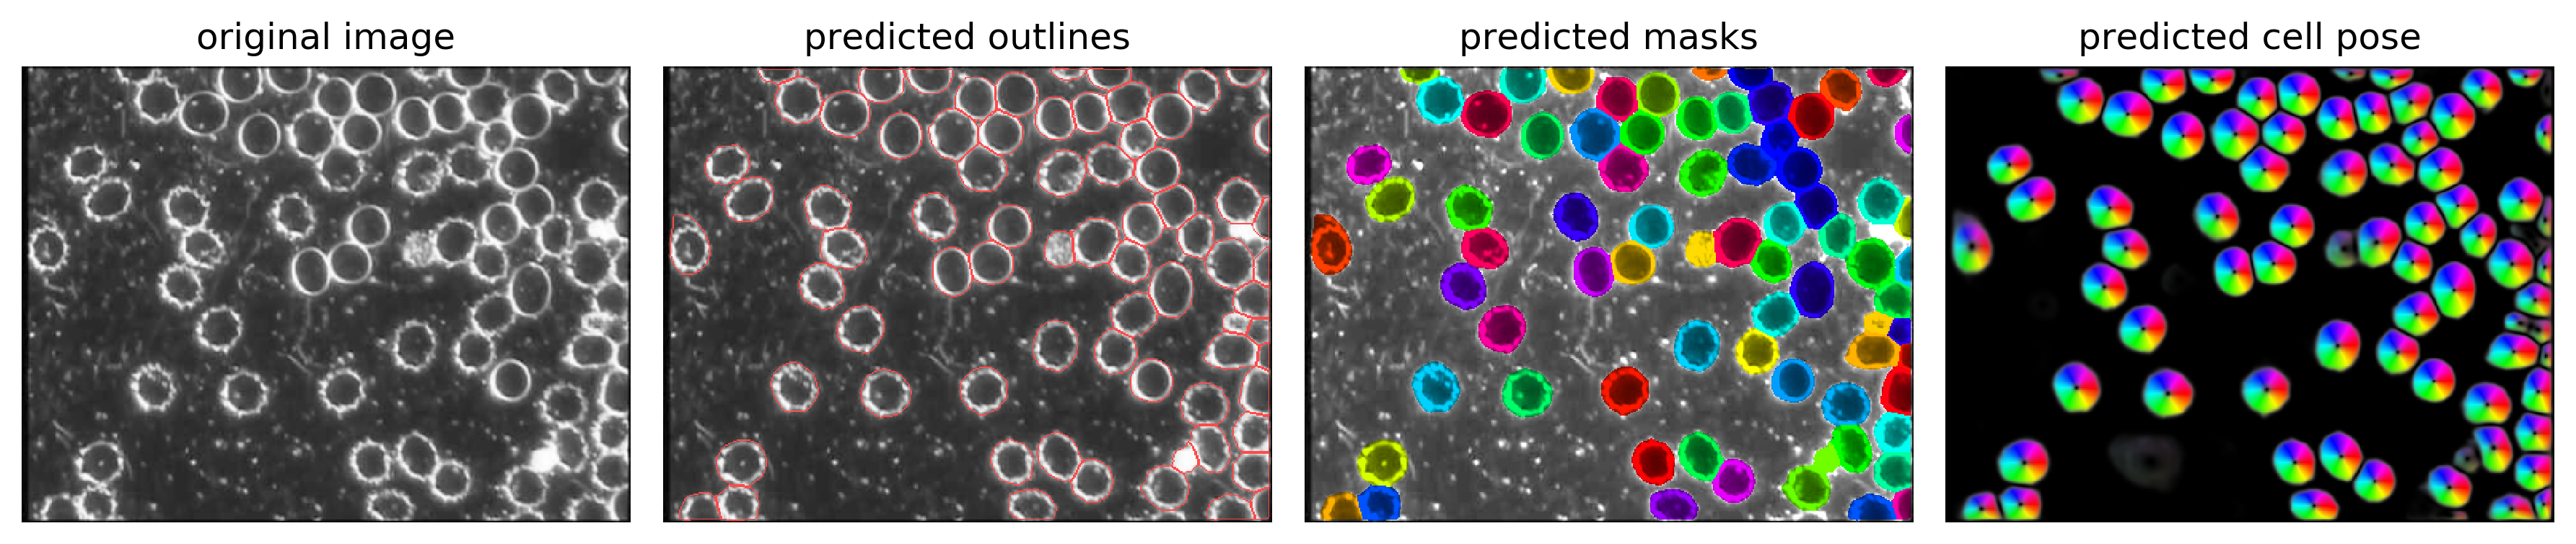

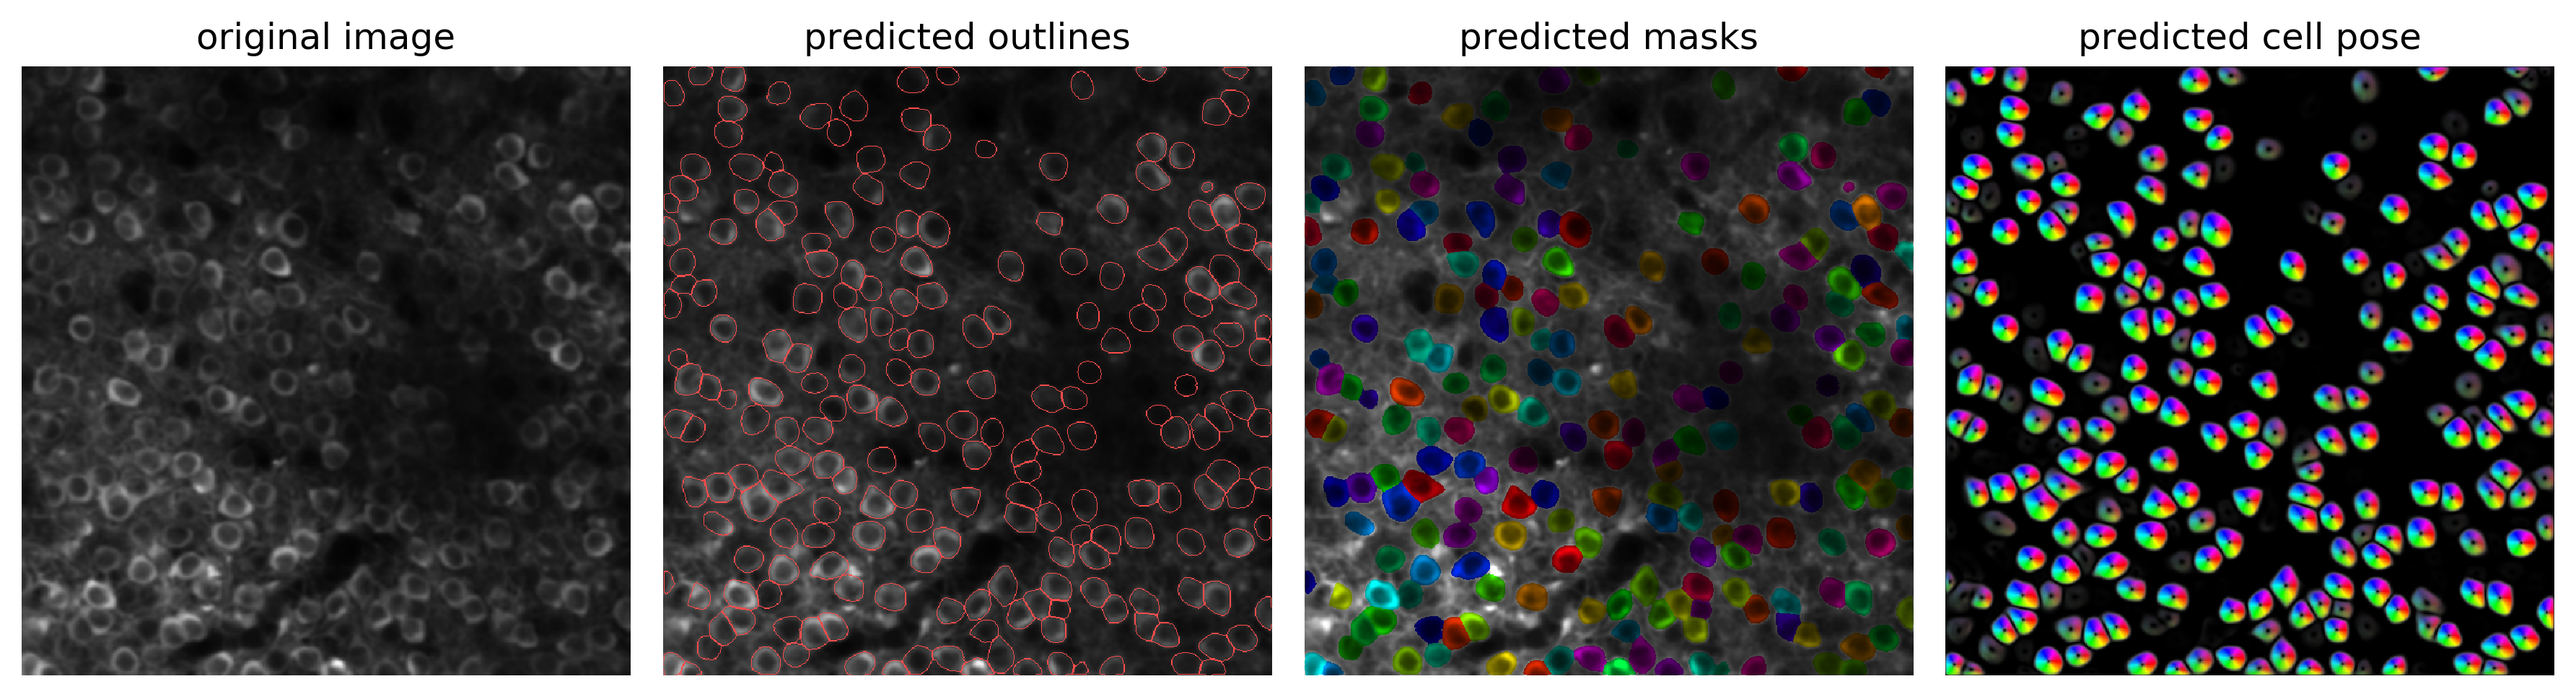

In [7]:
# DISPLAY RESULTS
from cellpose import plot

nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
    plt.tight_layout()
    plt.show()

